In [180]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gregorut/videogamesales")

print("Path to dataset files:", path)

Path to dataset files: /Users/jeongho/.cache/kagglehub/datasets/gregorut/videogamesales/versions/2


In [181]:
import tensorflow as tf

print(tf.__version__)

import sys

print("Python version:", sys.version)


import tensorflow_addons as tfa

print("TensorFlow Addons version:", tfa.__version__)

2.14.0
Python version: 3.9.6 (default, Oct  4 2024, 08:01:31) 
[Clang 16.0.0 (clang-1600.0.26.4)]
TensorFlow Addons version: 0.23.0-dev


In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [183]:
df = pd.read_csv(os.path.join(path, "vgsales.csv"), index_col="Rank")

In [184]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [186]:
columns_to_drop = ["Name", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

In [187]:
df = df.drop(columns_to_drop, axis=1)

In [188]:
df.isnull().sum()

Platform          0
Year            271
Genre             0
Publisher        58
Global_Sales      0
dtype: int64

In [189]:
df["Year"] = df["Year"].fillna(df["Year"].mean())

In [190]:
df = df.dropna(axis=0)

In [191]:
df

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006.0,Sports,Nintendo,82.74
2,NES,1985.0,Platform,Nintendo,40.24
3,Wii,2008.0,Racing,Nintendo,35.82
4,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16596,GBA,2002.0,Platform,Kemco,0.01
16597,GC,2003.0,Shooter,Infogrames,0.01
16598,PS2,2008.0,Racing,Activision,0.01


In [192]:
df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [193]:
df["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [194]:
df["Publisher"].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [195]:
df["Publisher"].value_counts()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

In [196]:
counts = df["Publisher"].value_counts()

df["Publisher"] = df["Publisher"].apply(
    lambda x: "Small Publisher" if counts[x] < 50 else x
)

In [197]:
df["Publisher"].value_counts()

Publisher
Small Publisher                           3342
Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Midway Games                               198
Eidos Interactive                          198
505 Games                                  192
Mic

In [198]:
onehot_columns = ["Platform", "Genre", "Publisher"]

In [199]:
def onehot_encode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column], dtype=int)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [200]:
df = onehot_encode(df, onehot_columns)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16540 entries, 1 to 16600
Data columns (total 92 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    16540 non-null  float64
 1   Global_Sales                            16540 non-null  float64
 2   2600                                    16540 non-null  int64  
 3   3DO                                     16540 non-null  int64  
 4   3DS                                     16540 non-null  int64  
 5   DC                                      16540 non-null  int64  
 6   DS                                      16540 non-null  int64  
 7   GB                                      16540 non-null  int64  
 8   GBA                                     16540 non-null  int64  
 9   GC                                      16540 non-null  int64  
 10  GEN                                     16540 non-null  int64  

In [202]:
y = df["Global_Sales"]
X = df.drop(["Global_Sales"], axis=1)

In [204]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [233]:
inputs = tf.keras.Input(shape=(91,))
x = tf.keras.layers.Dense(128, activation="relu")(inputs)
x = tf.keras.layers.Dense(128, activation="relu")(x)
outputs = tf.keras.layers.Dense(1)(x)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

optimizer = tf.keras.optimizers.legacy.RMSprop(0.001)
model.compile(optimizer=optimizer, loss="mse")

batch_size = 64
epochs = 14

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
)

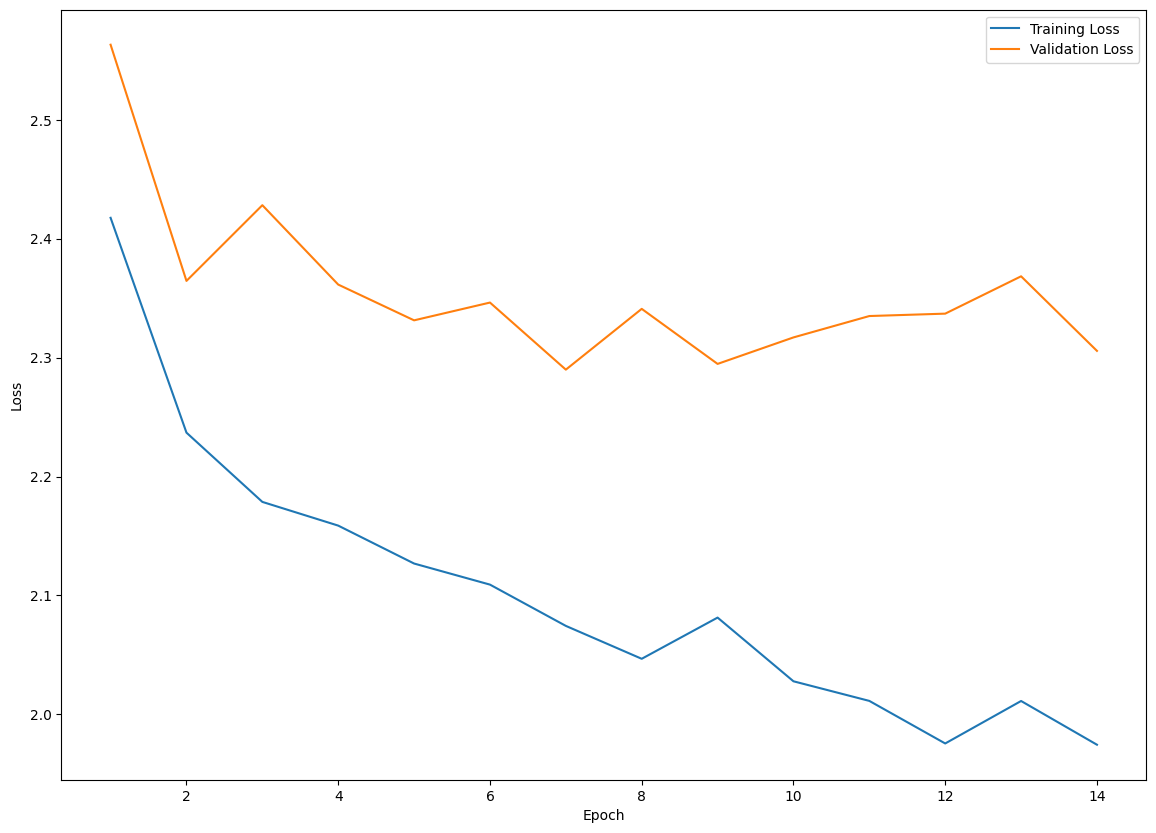

In [234]:
plt.figure(figsize=(14, 10))
epochs_range = range(1, epochs + 1)
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [232]:
np.argmin(val_loss)

14

In [219]:
y_pred = model.predict(X_test)

104/104 [==============================] - 0s 498us/step


In [235]:
model.evaluate(X_test, y_test)

104/104 [==============================] - 0s 885us/step - loss: 1.3126


1.3126463890075684